# K Means Clustering Algorithm


In [645]:
import numpy as np
from matplotlib import pyplot as plt

Loading the images

Image of a personality face
Shape of image: (480, 423, 4)


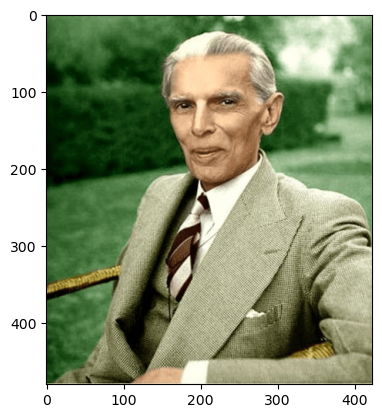

In [646]:
import cv2
print("Image of a personality face")
image1 = plt.imread("C:\\Users\\User\\OneDrive\\Desktop\\K-Mean\\Quaid-e-Azam.png")
plt.imshow(image1)
print(f"Shape of image: {image1.shape}")

Shape of image: (408, 612, 3)


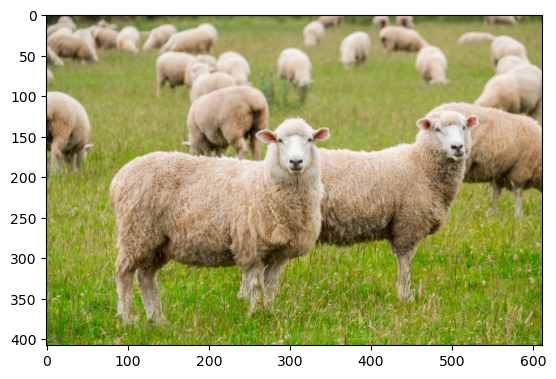

In [647]:
image2 = plt.imread("C:\\Users\\User\\OneDrive\\Desktop\\K-Mean\\SHEEPS.jpg")
plt.imshow(image2)
print(f"Shape of image: {image2.shape}")

Shape of image: (846, 564, 3)


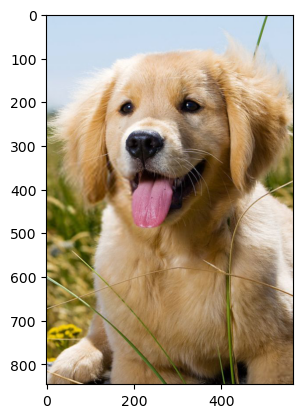

In [648]:
image3 = plt.imread("C:\\Users\\User\\OneDrive\\Desktop\\K-Mean\\golden.jpg")
plt.imshow(image3)
print(f"Shape of image: {image3.shape}")

Now defining the values of k for 3 times

In [649]:
k_one=3
k_two=10
k_three=20

First, finding the values of three variables height, width and colors using image.shape. Secondly, converting the 3d array into 2d array for easier manipulation where rows are the pixels and columns are the colors of each pixel which are actually 3 in the rgb format (red,green,blue). Now getting the number of pixels using img-2d.shape[0] where shape gives the number of rows and columns so since the rows comprise of the number of pixels, that's why using [0] index.
Next, choosing k random centroids using random.choice function.
Computing Euclidean distances between each pixel and the centroids by using np.linalg.norm function and then assigning each pixel to the centroid with the smallest distance. Also, doing the same step using Manhattan distance, both can be used here however, since sir used manhattan distance in class so using manhattan distance here. It calculates the Manhattan distances between each pixel in the image and each centroid by subtracting their coordinates, taking absolute differences, and summing them up. The resulting array holds these distances. Then it finds the index of the centroid with the minimum distance for each pixel and stores these indices in the assignments array. The axis=1 parameter specifies that the minimum index should be determined along the second axis, which corresponds to the centroids.Finally, assigns each pixel to its nearest centroid and constructs a new representation of the image with centroids replacing the original pixel values by reshaping the array back into its 3d form.

In [650]:
def implementing_kmean(img,k):
    height, width, colors = img.shape #get the required variable values
    #print(colors)
    img_2d = img.reshape(height * width, colors) 
    #reshape the array in the form such that each row represents a pixel whereas each column represnts one of the rgb colors 
    print(img_2d.shape) #printing the shape of the reshaped array 
    #getting the number of pixels
    num_pixels = img_2d.shape[0]
    #choosing k random indices
    centroid_indices = np.random.choice(num_pixels, k, replace=False)
    #extracting centroids from the data
    centroids = img_2d[centroid_indices]
    #computing Euclidean distances between each pixel and the centroids
    #distances_to_centroids = np.linalg.norm(img_2d[:, np.newaxis] - centroids, axis=2)
    #computing Manhattan distances between each pixel and the centroids
    distances_to_centroids = np.sum(np.abs(img_2d[:, np.newaxis] - centroids), axis=2)
    #assigning each pixel to the centroid with the smallest distance
    assignments = np.argmin(distances_to_centroids, axis=1)
    #creating an array to store the recreated image
    recreated_img2 = np.zeros((img_2d.shape[0], centroids.shape[1]), dtype=centroids.dtype)
    recreated_img2 = centroids[assignments]
    img_3d = recreated_img2.reshape(height,width, colors)
    return img_3d
    

Now calling this function for each image with 3 k(2,10,20) values 


# For Image 1

In [651]:
image1_3=implementing_kmean(image1,k_one)
image1_10=implementing_kmean(image1,k_two)
image1_20=implementing_kmean(image1,k_three)

(203040, 4)
(203040, 4)
(203040, 4)


# For Image 2

In [652]:
image2_3=implementing_kmean(image2,k_one)
image2_10=implementing_kmean(image2,k_two)
image2_20=implementing_kmean(image2,k_three)

(249696, 3)
(249696, 3)
(249696, 3)


# For Image 3

In [653]:
image3_3=implementing_kmean(image3,k_one)
image3_10=implementing_kmean(image3,k_two)
image3_20=implementing_kmean(image3,k_three)

(477144, 3)
(477144, 3)
(477144, 3)


# Original images before K Mean Clustering

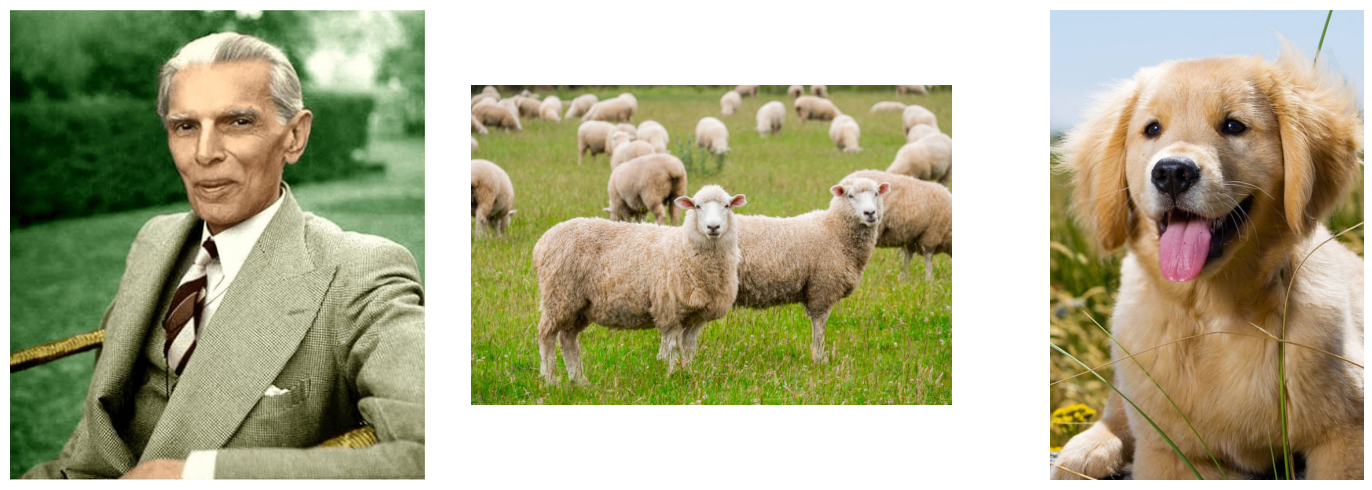

In [654]:
def plot_images(images,titles=None):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Creates a figure with 3 subplots
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])  # Displaying each image in a subplot
        ax.axis('off')  # Turning off axis for better visualization
        if titles:
            ax.set_title(titles[i],fontsize=16)  # Set title for each subplot if titles are provided
    plt.tight_layout()  # Adjusting spacing between subplots
    plt.show()  # Showing the figure containing the subplots

# Example usage:
image_batch = [image1, image2, image3]  # List containing three images
titles=['k=3','k=10','k=20']
plot_images(image_batch)  # Plot the images in a batch


# Image 1 - K Mean Clustering

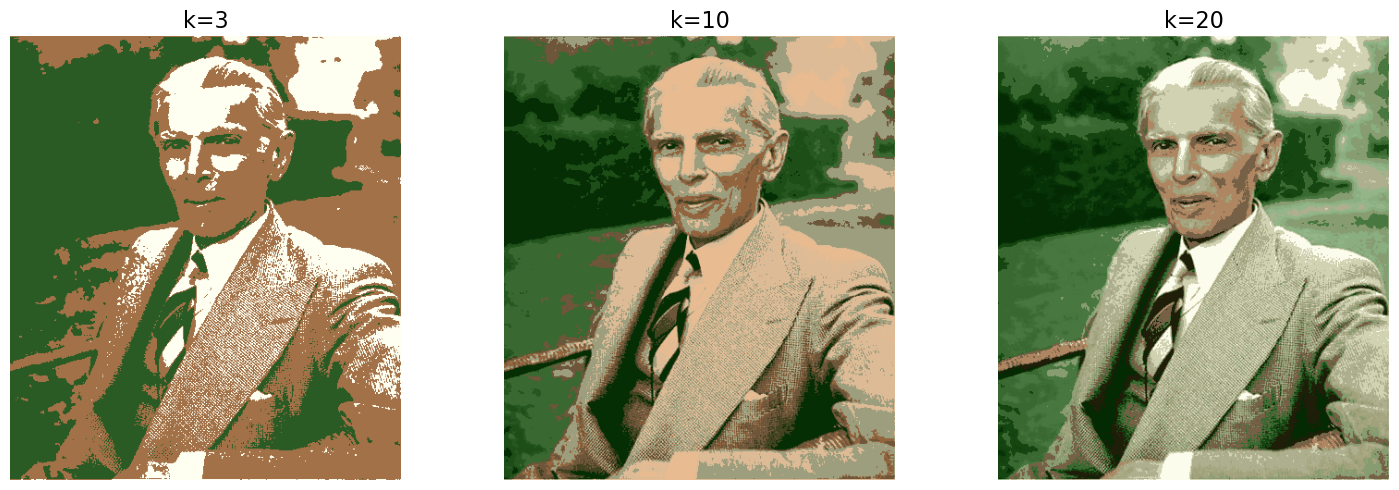

In [655]:
image_batch1 = [image1_3, image1_10, image1_20]  # List containing three images

plot_images(image_batch1,titles)  # Plot the images in a batch


# Image 2 - K Mean Clustering

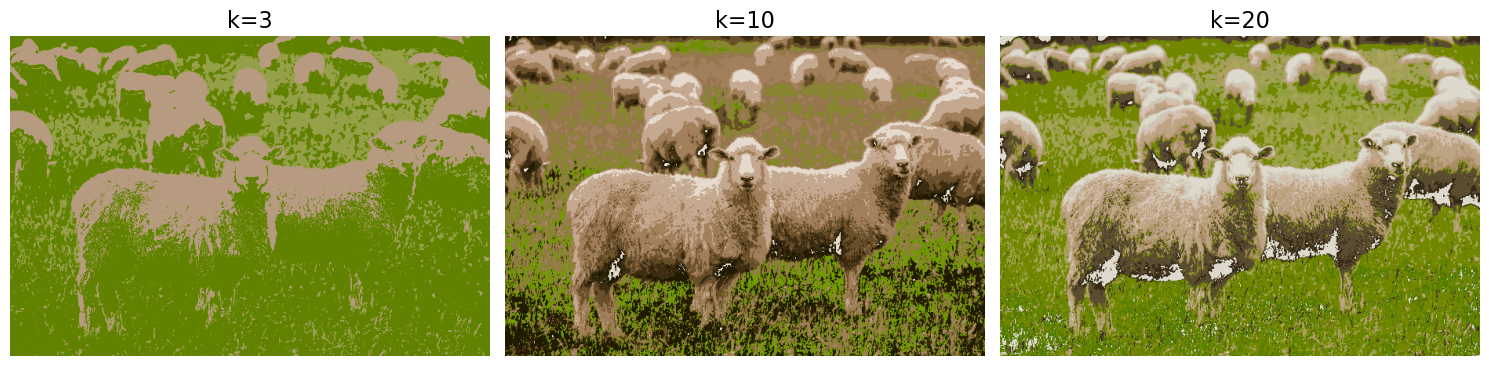

In [656]:


image_batch2 = [image2_3, image2_10, image2_20]  # List containing three images

plot_images(image_batch2,titles)  # Plot the images in a batch


# Image 3 - K Mean Clustering

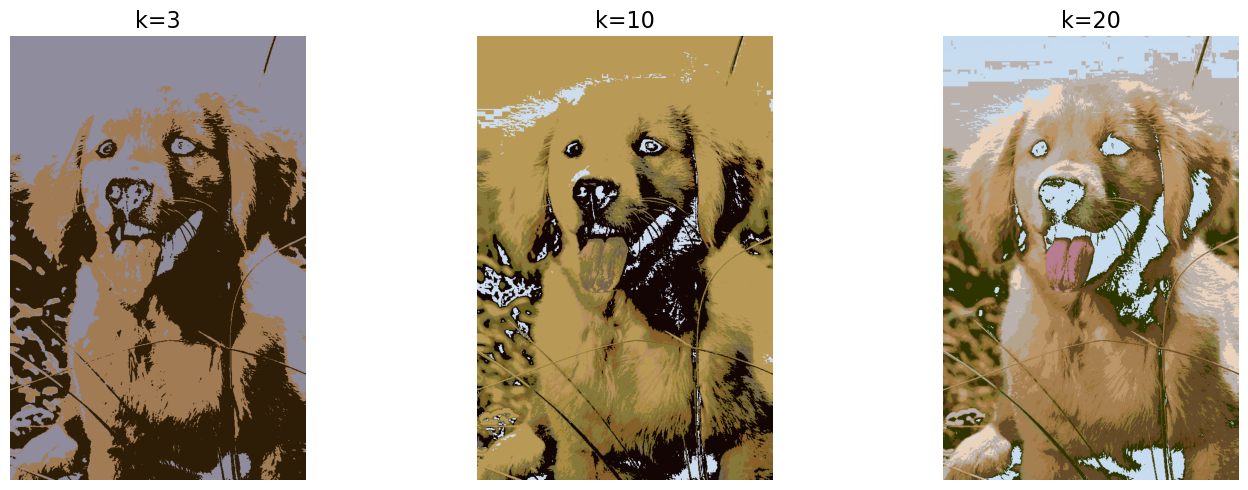

In [657]:

image_batch3 = [image3_3, image3_10, image3_20]  # List containing three images

plot_images(image_batch3,titles)  # Plot the images in a batch


# Grid of 9 images of K mean clustering algorithm in 1 frame


It displays a batch of images in a 3x3 grid with optional titles. The function is then used to plot a batch of images, each labeled with its corresponding title

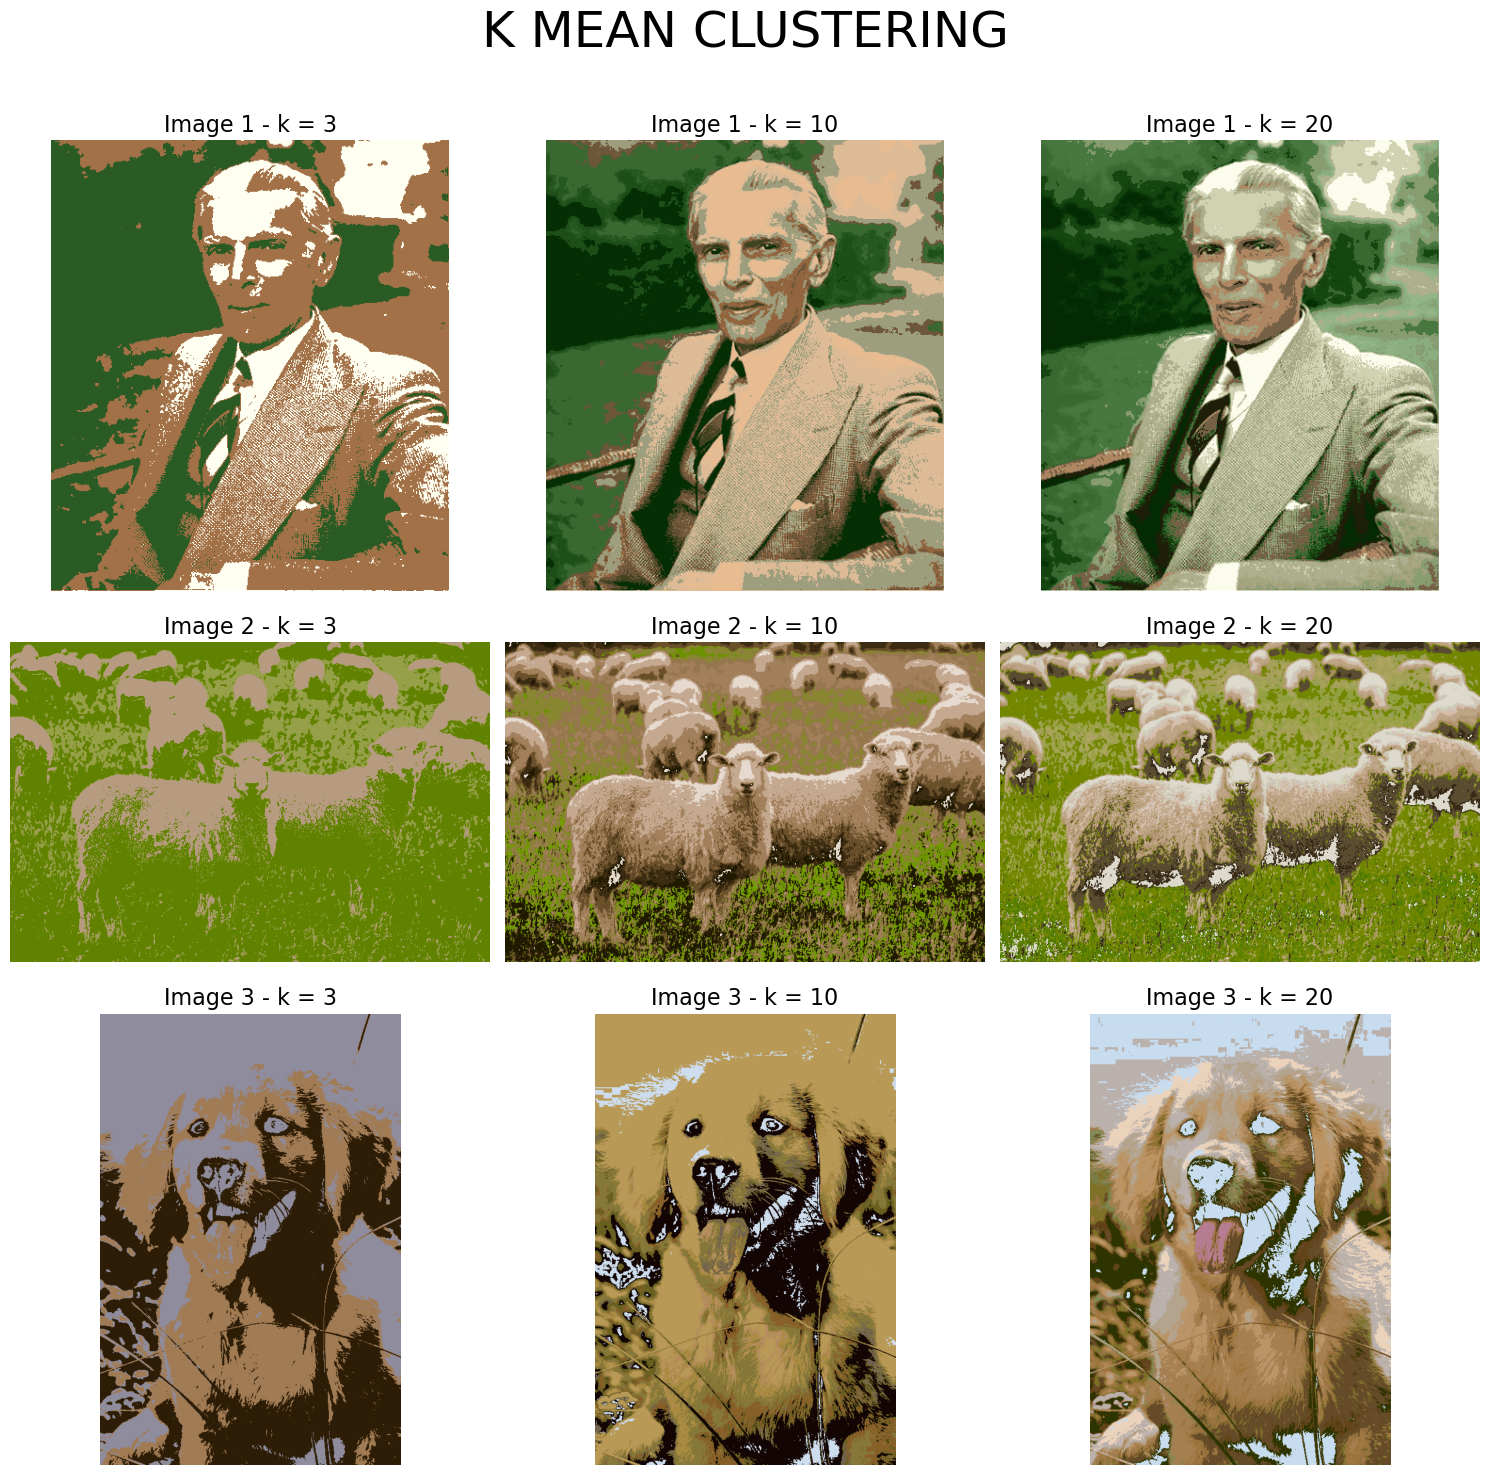

In [658]:
def plot_images(images, titles=None):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Creating a figure with 3x3 subplots
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])  # Displaying each image in a subplot
        ax.axis('off')  # Turning off axis for better visualization
        if titles:
            ax.set_title(titles[i],fontsize=16)  # Set title for each subplot if titles are provided
    plt.suptitle("K MEAN CLUSTERING\n", fontsize=36)  # Adding a heading above the batch of images
    plt.tight_layout()  # Adjusting spacing between subplots
    plt.show()  # Showing the figure containing the subplots

image_batch = [image1_3, image1_10, image1_20, image2_3, image2_10, image2_20, image3_3, image3_10, image3_20]  # List containing nine images
titless = ['Image 1 - k = 3', 'Image 1 - k = 10', 'Image 1 - k = 20', 'Image 2 - k = 3', 'Image 2 - k = 10', 'Image 2 - k = 20', 'Image 3 - k = 3', 'Image 3 - k = 10', 'Image 3 - k = 20']  # List containing titles for each image

plot_images(image_batch, titless)  # Plotting the images in a 3x3 grid with titles


Random for checking

In [659]:
random = plt.imread("C:\\Users\\User\\OneDrive\\Desktop\\K-Mean\\parrots.jpeg")

(50562, 3)
(50562, 3)
(50562, 3)
(50562, 3)
(50562, 3)
(50562, 3)
(50562, 3)
(50562, 3)


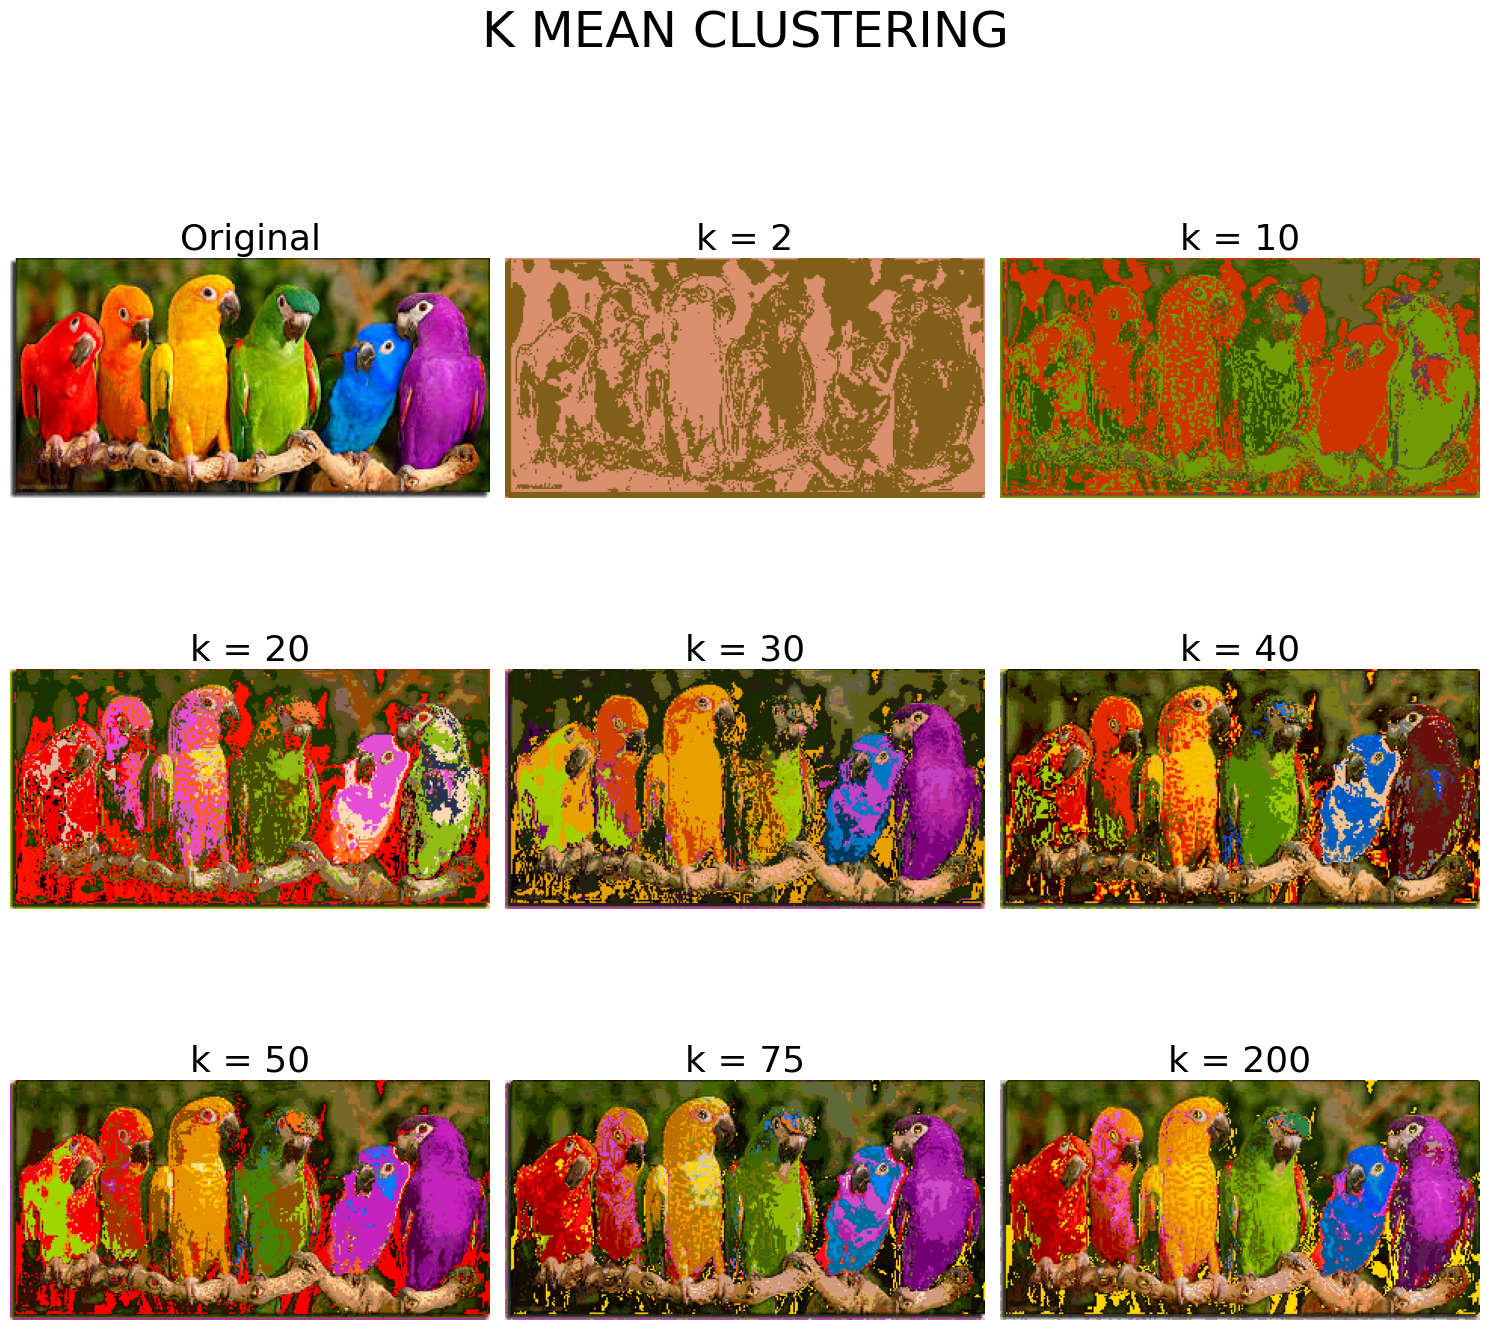

In [660]:
def plot_images(images, titles=None):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Creating a figure with 3x3 subplots
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])  # Displaying each image in a subplot
        ax.axis('off')  # Turning off axis for better visualization
        if titles:
            ax.set_title(titles[i],fontsize=26)  # Setting title for each subplot if titles are provided
    plt.suptitle("K MEAN CLUSTERING\n", fontsize=36)  # Adding a heading above the batch of images
    plt.tight_layout()  # Adjusting spacing between subplots
    plt.show()  # Showing the figure containing the subplots

image_batch = [random,implementing_kmean(random,2), implementing_kmean(random,10), implementing_kmean(random,20), implementing_kmean(random,30), implementing_kmean(random,40), implementing_kmean(random,50),implementing_kmean(random,75), implementing_kmean(random,200) ]  # List containing nine images
titlesss = ['Original','k = 2', 'k = 10', 'k = 20', 'k = 30', 'k = 40', 'k = 50', 'k = 75', 'k = 200']  # List containing titles for each image

plot_images(image_batch, titlesss)  # Plotting the images in a 3x3 grid with titles
